In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re

In [20]:
def get_latest_directory(dir_path="./results"):
    '''
    Utility function for finding the directory of the latest run

    Parameters
    ----------
    dir_path : the path to a directory containing the results folders (which have names 'run-000', 'run-001', etc)

    Returns
    -------
    max_run_id : the integer ID of the most recent run
    max_run_path : the absolute path to the most recent run directory
    '''
    if not os.path.isdir(dir_path):
        os.makedirs(dir_path)

    # find the next availible run_id in the specified results directory
    max_run_id = 0
    dir_names = os.listdir(dir_path)
    for name in dir_names:
        x = re.match("run-(\d{3})", name)
        if x is not None:
            found_run_id = int(x.group(1))
            if found_run_id > max_run_id:
                max_run_id = found_run_id

    # return the run_id and a path to that folder
    max_run_dir = "run-{:03d}".format(max_run_id)
    max_run_path = os.path.join(os.path.abspath(dir_path), max_run_dir)

    return max_run_id, max_run_path

In [21]:
run_id, run_path = get_latest_directory("../../results/vary-dim/")
fig_output_path = "run-{:03d}".format(run_id)
try:
    os.makedirs(fig_output_path)
except FileExistsError:
    print("Directory already exists")
print("Generating figures for run-{:03d}".format(run_id))

Directory already exists
Generating figures for run-007


In [22]:
cardio = pd.read_csv(run_path + "/cardio.csv").groupby(["n_features"]).mean().reset_index()
musk = pd.read_csv(run_path + "/musk.csv").groupby(["n_features"]).mean().reset_index()
thyroid = pd.read_csv(run_path + "/thyroid.csv").groupby(["n_features"]).mean().reset_index()
wbc = pd.read_csv(run_path + "/wbc.csv").groupby(["n_features"]).mean().reset_index()

In [23]:
cmap = plt.get_cmap("Set1")
colors = cmap.colors

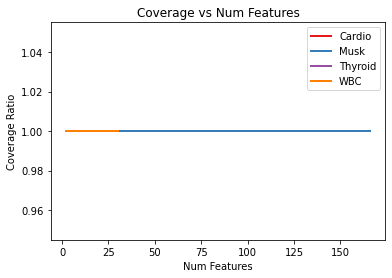

In [24]:
# coverage
plt.figure()
plt.plot(cardio.n_features, cardio.coverage_ratio, label="Cardio", color=colors[0], lw=2.0)
plt.plot(musk.n_features, musk.coverage_ratio, label="Musk", color=colors[1], lw=2.0)
plt.plot(thyroid.n_features, thyroid.coverage_ratio, label="Thyroid", color=colors[3], lw=2.0)
plt.plot(wbc.n_features, wbc.coverage_ratio, label="WBC", color=colors[4], lw=2.0)
plt.xlabel("Num Features")
plt.ylabel("Coverage Ratio")
plt.title("Coverage vs Num Features")
plt.legend(loc="best")
# plt.xlim([2, 30])
# plt.xticks(range(2, 30, 2))
plt.savefig(fig_output_path + "/coverage_nfeatures.png")

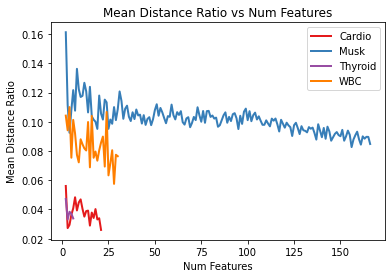

In [25]:
# distance
plt.figure()
plt.plot(cardio.n_features, cardio.mean_distance / np.sqrt(cardio.n_features), label="Cardio", color=colors[0], lw=2.0)
plt.plot(musk.n_features, musk.mean_distance / np.sqrt(musk.n_features), label="Musk", color=colors[1], lw=2.0)
plt.plot(thyroid.n_features, thyroid.mean_distance / np.sqrt(thyroid.n_features), label="Thyroid", color=colors[3], lw=2.0)
plt.plot(wbc.n_features, wbc.mean_distance / np.sqrt(wbc.n_features), label="WBC", color=colors[4], lw=2.0)
plt.xlabel("Num Features")
plt.ylabel("Mean Distance Ratio")
plt.title("Mean Distance Ratio vs Num Features")
plt.legend(loc="best")
# plt.xlim([2, 30])
# plt.xticks(range(2, 30, 2))
plt.savefig(fig_output_path + "/distance_ratio_nfeatures.png")

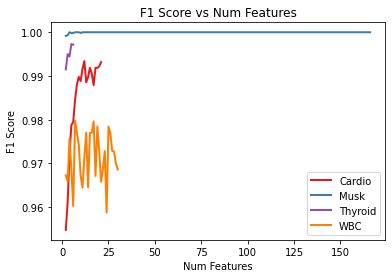

In [26]:
# f1 score
plt.figure()
plt.plot(cardio.n_features, cardio.f1, label="Cardio", color=colors[0], lw=2.0)
plt.plot(musk.n_features, musk.f1, label="Musk", color=colors[1], lw=2.0)
plt.plot(thyroid.n_features, thyroid.f1, label="Thyroid", color=colors[3], lw=2.0)
plt.plot(wbc.n_features, wbc.f1, label="WBC", color=colors[4], lw=2.0)
plt.xlabel("Num Features")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Num Features")
plt.legend(loc="best")
# plt.xlim([2, 30])
# plt.xticks(range(2, 30, 2))
plt.savefig(fig_output_path + "/f1_nfeatures.png")

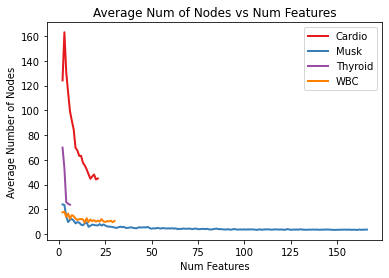

In [27]:
# number of nodes
plt.figure()
plt.plot(cardio.n_features, cardio.avg_nnodes, label="Cardio", color=colors[0], lw=2.0)
plt.plot(musk.n_features, musk.avg_nnodes, label="Musk", color=colors[1], lw=2.0)
plt.plot(thyroid.n_features, thyroid.avg_nnodes, label="Thyroid", color=colors[3], lw=2.0)
plt.plot(wbc.n_features, wbc.avg_nnodes, label="WBC", color=colors[4], lw=2.0)
plt.xlabel("Num Features")
plt.ylabel("Average Number of Nodes")
plt.title("Average Num of Nodes vs Num Features")
plt.legend(loc="best")
# plt.xlim([2, 30])
plt.savefig(fig_output_path + "/nnodes_nfeatures.png")

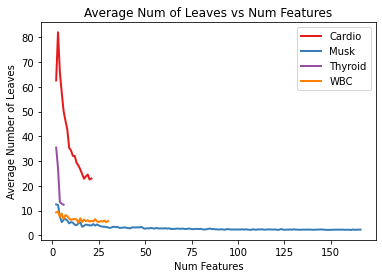

In [28]:
# number of leaves
plt.figure()
plt.plot(cardio.n_features, cardio.avg_nleaves, label="Cardio", color=colors[0], lw=2.0)
plt.plot(musk.n_features, musk.avg_nleaves, label="Musk", color=colors[1], lw=2.0)
plt.plot(thyroid.n_features, thyroid.avg_nleaves, label="Thyroid", color=colors[3], lw=2.0)
plt.plot(wbc.n_features, wbc.avg_nleaves, label="WBC", color=colors[4], lw=2.0)
plt.xlabel("Num Features")
plt.ylabel("Average Number of Leaves")
plt.title("Average Num of Leaves vs Num Features")
plt.legend(loc="best")
# plt.xlim([2, 30])
plt.savefig(fig_output_path + "/nleaves_nfeatures.png")

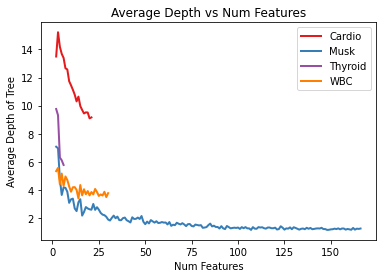

In [29]:
# depth
plt.figure()
plt.plot(cardio.n_features, cardio.avg_depth, label="Cardio", color=colors[0], lw=2.0)
plt.plot(musk.n_features, musk.avg_depth, label="Musk", color=colors[1], lw=2.0)
plt.plot(thyroid.n_features, thyroid.avg_depth, label="Thyroid", color=colors[3], lw=2.0)
plt.plot(wbc.n_features, wbc.avg_depth, label="WBC", color=colors[4], lw=2.0)
plt.xlabel("Num Features")
plt.ylabel("Average Depth of Tree")
plt.title("Average Depth vs Num Features")
plt.legend(loc="best")
# plt.xlim([2, 30])
plt.savefig(fig_output_path + "/depth_nfeatures.png")

OSError: [Errno 22] Invalid argument: 'run-007/qstatistic_nfeatures.png'

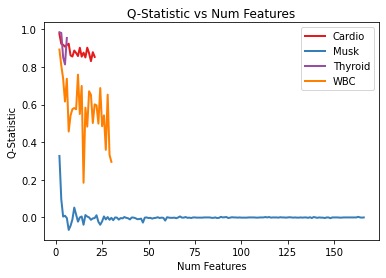

In [30]:
# q-statistic
plt.figure()
plt.plot(cardio.n_features, cardio.q, label="Cardio", color=colors[0], lw=2.0)
plt.plot(musk.n_features, musk.q, label="Musk", color=colors[1], lw=2.0)
plt.plot(thyroid.n_features, thyroid.q, label="Thyroid", color=colors[3], lw=2.0)
plt.plot(wbc.n_features, wbc.q, label="WBC", color=colors[4], lw=2.0)
plt.xlabel("Num Features")
plt.ylabel("Q-Statistic")
plt.title("Q-Statistic vs Num Features")
plt.legend(loc="best")
plt.savefig(fig_output_path + "/qstatistic_nfeatures.png")

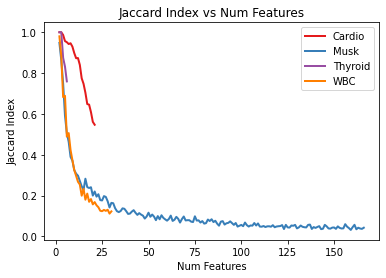

In [ ]:
# Jaccard Index
plt.figure()
plt.plot(cardio.n_features, cardio.jaccard, label="Cardio", color=colors[0], lw=2.0)
plt.plot(musk.n_features, musk.jaccard, label="Musk", color=colors[1], lw=2.0)
plt.plot(thyroid.n_features, thyroid.jaccard, label="Thyroid", color=colors[3], lw=2.0)
plt.plot(wbc.n_features, wbc.jaccard, label="WBC", color=colors[4], lw=2.0)
plt.xlabel("Num Features")
plt.ylabel("Jaccard Index")
plt.title("Jaccard Index vs Num Features")
plt.legend(loc="best")
plt.savefig(fig_output_path + "/jaccard_nfeatures.png")